#  Reduced particle densities

```{note}
Should expand the discussions of what is being illustrated.
```

## One-particle density
The one-particle density can be written as an expectation of a one-electron operator according to

$$
n(\mathbf{r}) =
\langle \Psi | \hat{n}(\mathbf{r}) | \Psi \rangle
$$

with

$$
\hat{n}(\mathbf{r}) = 
\sum_{i=1}^N
\delta(\mathbf{r} - \mathbf{r}_i)
$$

For an $N$-electron system in a state described by a Slater determinant, the one-electron density becomes

$$
n(\mathbf{r}) = \sum_{i=1}^N |\psi_i(\mathbf{r})|^2
$$

where the summation run over the $N$ occupied spin orbitals.

In [1]:
import veloxchem as vlx
import matplotlib.pyplot as plt
import numpy as np

* Warning * Environment variable OMP_NUM_THREADS not set.
* Warning * Setting OMP_NUM_THREADS to 8.
* Warning * Setting MKL_THREADING_LAYER to "INTEL".


In [58]:
mol_str = """
C        0.00000000    0.00000000    0.00000000
O        0.00000000    0.00000000    1.43
"""
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')
basis = vlx.MolecularBasis.read(molecule, 'cc-pVDZ')

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.compute(molecule, basis)

density = scf_drv.density

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [76]:
vis_drv = vlx.VisualizationDriver()

# list of coordinates in units of Bohr
n = 200
coords = np.zeros((n,3))
z = np.linspace(-1, 4, n)
coords[:,2] = z

mo = 0
one_part_den = vis_drv.get_density(coords, molecule, basis, density, mo, 'alpha')

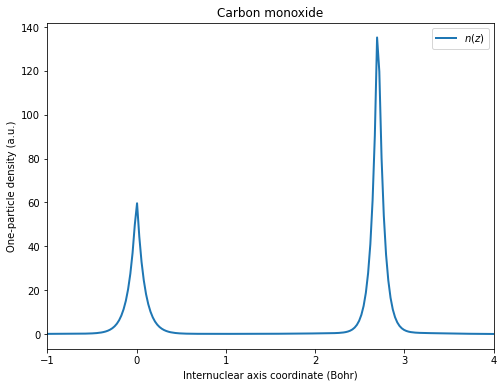

In [77]:
fig = plt.figure(1, figsize=(8,6))

plt.plot(z, one_part_den, lw = 2, label = r'$n(z)$')

plt.setp(plt.gca(), xlim = (-1,4))
plt.legend()

plt.title(r'Carbon monoxide')
plt.xlabel(r'Internuclear axis coordinate (Bohr)')
plt.ylabel(r'One-particle density (a.u.)')

plt.show()

## Two-particle density
The one-particle density can be written as an expectation of a two-electron operator according to

$$
n(\mathbf{r}, \mathbf{r}') =
\langle \Psi | \hat{n}(\mathbf{r}, \mathbf{r}') | \Psi \rangle
$$

with

$$
\hat{n}(\mathbf{r}, \mathbf{r}') = 
\sum_{j>i}^N \left[
\delta(\mathbf{r} - \mathbf{r}_i) \delta(\mathbf{r}' - \mathbf{r}_j)
+
\delta(\mathbf{r} - \mathbf{r}_j) \delta(\mathbf{r}' - \mathbf{r}_i)
\right]
$$

For an $N$-electron system in a state described by a Slater determinant, the two-electron density becomes

$$
n(\mathbf{r}_1, \mathbf{r}_2)
= \sum_{i=1}^N
\sum_{j=1}^N 
\left[\rule{0pt}{12pt}
|\psi_i(\mathbf{r}_1)|^2
|\psi_j(\mathbf{r}_2)|^2
-
\psi_i^\dagger(\mathbf{r}_1)
\psi_j^\dagger(\mathbf{r}_2)
\psi_j(\mathbf{r}_1)
\psi_i(\mathbf{r}_2)
\right]
$$

where the summations run over the $N$ occupied spin orbitals.
